In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path=r'C:\Users\jecka\2023-09-11 Achievement 4 Python'

In [4]:
# Import newest dataset
customers_ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_ords_prods_merge.pkl'))

In [4]:
# Checking dataframe 
customers_ords_prods.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_type,past_orders_median,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
#Checking column names
customers_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   first                  object  
 2   last                   object  
 3   gender                 object  
 4   state                  object  
 5   age                    int64   
 6   date_joined            object  
 7   number_of_dependents   int64   
 8   marital_status         object  
 9   income                 int64   
 10  order_id               int64   
 11  eval_set               object  
 12  order_number           int64   
 13  orders_day_of_week     int64   
 14  order_hour_of_day      int64   
 15  days_since_last_order  float64 
 16  product_id             float64 
 17  add_to_cart_order      float64 
 18  reordered              float64 
 19  product_name           object  
 20  aisle_id               int64   
 21  department_id          int64 

# Task 4.10 Questions

## Step 2 Consider any security implications that might exist for this new data.

This data contains personal information. The client's first and last names are listed. This can be removed as another identifier we have is user ID. Everything else is not considered PII.

In [7]:
# Addressing implications and dropping name columns
# Changing the name to cop (Customers = C, Orders = O, Products = P)
cop_user_info = customers_ords_prods.drop(columns = ['first', 'last'])

In [7]:
# Checking to make sure previous command was successful
cop_user_info.head()

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,eval_set,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_type,past_orders_median,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


## Step 3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

In [8]:
# Adding Region of state
result =[]
for value in cop_user_info['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        result.append('West')
    else:
        result.append('Unknown')

In [9]:
# Checking Result
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [10]:
# Create new column from result output
cop_user_info['region'] = result

In [11]:
# Checking new column
cop_user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   gender                 object  
 2   state                  object  
 3   age                    int64   
 4   date_joined            object  
 5   number_of_dependents   int64   
 6   marital_status         object  
 7   income                 int64   
 8   order_id               int64   
 9   eval_set               object  
 10  order_number           int64   
 11  orders_day_of_week     int64   
 12  order_hour_of_day      int64   
 13  days_since_last_order  float64 
 14  product_id             float64 
 15  add_to_cart_order      float64 
 16  reordered              float64 
 17  product_name           object  
 18  aisle_id               int64   
 19  department_id          int64   
 20  prices                 float64 
 21  _merge                 catego

In [12]:
# Checking counts of each reason
cop_user_info['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
# Checking spending habits of different regions
crosstab = pd.crosstab(cop_user_info['spender_type'], cop_user_info['region'], dropna = False)

In [14]:
crosstab.to_clipboard()

#### *Determine whether there’s a difference in spending habits between the different U.S. regions.*
There isn't much of a difference in spending habits between each region. 2% of each region are high spenders, with the southern region has the highest count in both High and low spenders.

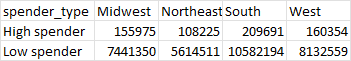

In [15]:
# changing the name of crosstab
regional_spending = crosstab

## Step 4:Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [16]:
#using max_order data to flag those who have placed fewer than 5 orders
cop_user_info.loc[cop_user_info['max_order'] < 5, 'order_act'] = 'low_activity'

In [17]:
cop_user_info.loc[cop_user_info['max_order'] >= 5, 'order_act'] = 'high_activity'

In [18]:
# Create Subset of Low activity users
active_low = cop_user_info[cop_user_info['order_act'] == 'low_activity']

In [19]:
# Create subset of high activity users
active_high = cop_user_info[cop_user_info['order_act'] == 'high_activity']

In [20]:
# Checking low activity subset
active_low.head()

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,eval_set,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_type,past_orders_median,frequency_flag,region,order_act
729,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,prior,...,Regularly busy,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low_activity
730,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,prior,...,Least busy,Most orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low_activity
731,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1870356,prior,...,Busiest day,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low_activity
732,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1903574,prior,...,Regularly busy,Average orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low_activity
733,168851,Male,South Carolina,30,1/1/2017,0,single,63712,1193140,prior,...,Least busy,Most orders,3,New customer,7.485714,Low spender,20.5,Non-frequent customer,South,low_activity


In [21]:
# Exporting subsets to pkl file
active_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity.pkl'))

In [22]:
# Exporting high subset to  pkl file
active_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity.pkl'))

## Step 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Age group

In [23]:
cop_user_info['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### The range from as low as 18 to as high as 81. Ages will be grouped into: 
##### **18-30**,  **31-44**,  **45-59**,  and  **60+**

In [24]:
#Creating age groups with Loc
cop_user_info.loc[cop_user_info['age'] <=30, 'age_group'] = '18-30 yrs'

In [25]:
cop_user_info.loc[(cop_user_info['age'] >=31) & (cop_user_info['age'] <45), 'age_group'] = '31-44 yrs'

In [26]:
cop_user_info.loc[(cop_user_info['age'] >=45) & (cop_user_info['age'] <60), 'age_group'] = '45-59 yrs'

In [27]:
cop_user_info.loc[cop_user_info['age'] >=60, 'age_group'] = '60+ yrs'

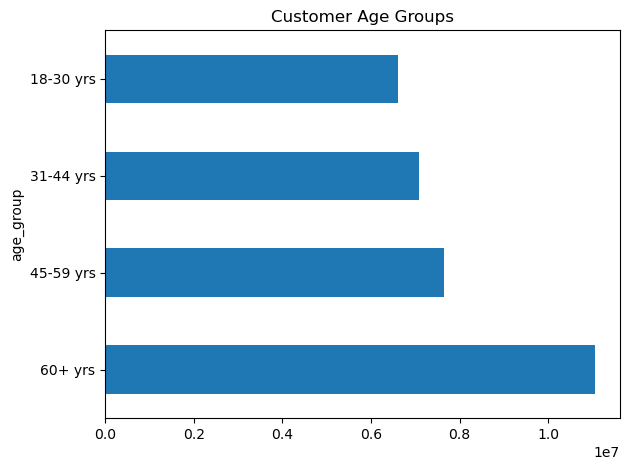

In [28]:
# Creating a bar chart to compare newly formed age groups
bar_age_group = cop_user_info['age_group'].value_counts().plot.barh()
plt.title("Customer Age Groups",fontsize=12)
plt.tight_layout()

In [29]:
# Exportiing bar chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','age_groups_bar.png'))

### Income

In [30]:
# Checking income column
cop_user_info['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

#### The range of income is from 25,903 to 593,901. However the numbers seem inflated from what is known of the economy in the US. I've sperated the totals into three groups below:
##### Low income = under 55,000
##### Medium Income = 55,000 to 200,000
##### High income = over 200,000

In [31]:
# Applying the groups with loc
cop_user_info.loc[cop_user_info['income'] <55000, 'income_group'] = 'low income'

In [32]:
cop_user_info.loc[(cop_user_info['income'] >=55000) & (cop_user_info['income'] <=200000), 'income_group'] = 'medium income'

In [33]:
cop_user_info.loc[cop_user_info['income'] >200000, 'income_group'] = 'high income'

In [34]:
# Checking counts of each age group
cop_user_info['income_group'].value_counts()

income_group
medium income    27406431
low income        4739985
high income        258443
Name: count, dtype: int64

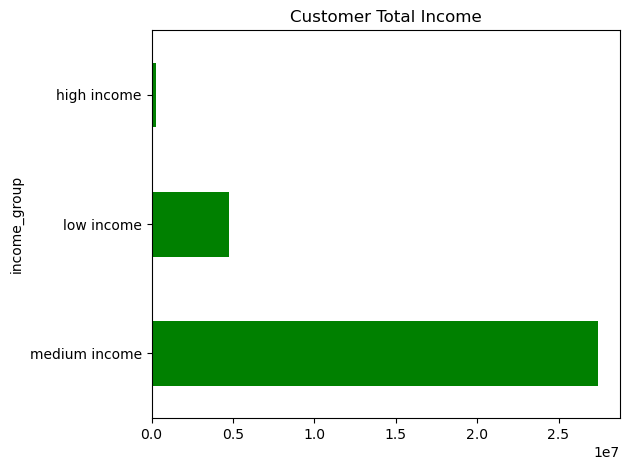

In [38]:
# Create a bar chart to compare the income groups
bar_income = cop_user_info['income_group'].value_counts().plot.barh(color='green')
plt.title("Customer Total Income",fontsize=12)
plt.tight_layout()

In [39]:
# Exportiing bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_group_bar.png'))

### Department Goods

In [10]:
# Importing Wrangled file
depart = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [41]:
depart.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
# Renaming Unnamed column to department_id
depart.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [ ]:
# Checking to see the change was applied
depart.head(21)

In [44]:
# Checking department_id column on cop_user_info
cop_user_info['department_id'].max()

21

In [45]:
cop_user_info['department_id'].min()

1

In [12]:
# Merge both df on department_id columns
dcop_merged =  cop_user_info.merge(depart, on = 'department_id')

In [13]:
# Checking
dcop_merged.head(3)

,user_id,gender,state,age,date_joined,number_of_dependents,marital_status,income,order_id,eval_set,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_type,past_orders_median,frequency_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages


Text(0.5, 1.0, 'Count of Items per department')

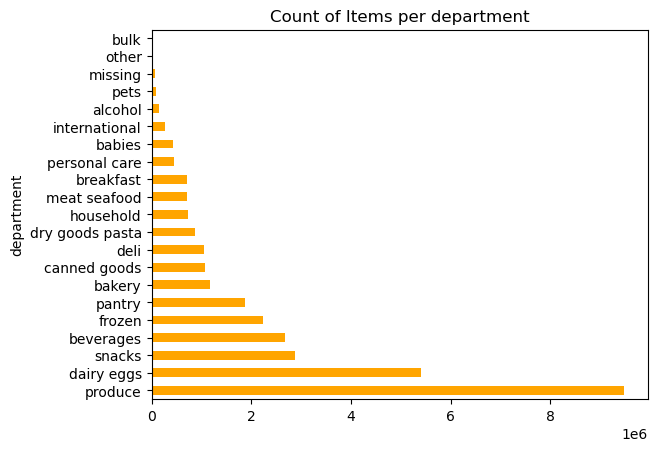

In [14]:
bar_departments = dcop_merged['department'].value_counts().plot.barh(color = 'orange')
plt.title("Count of Items per department",fontsize=12)

In [ ]:
# Exportiing bar chart
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','depart_count_bar.png'))

### Number of Dependents

In [15]:
dcop_merged['number_of_dependents'].value_counts()

number_of_dependents
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

#### All totals have above 8 milion entries. The question is how to crate groups out of it.
#### After thinking about it, I've decided on the following:
##### 0 dependents would be no children.
##### 1-2 would be small family.
##### 3 dependents would be large family.

In [16]:
# Applying the group using Loc
dcop_merged.loc[dcop_merged['number_of_dependents'] <1, 'family_size'] = 'no children'

In [17]:
dcop_merged.loc[(dcop_merged['number_of_dependents'] >=1) & (dcop_merged['number_of_dependents'] <3), 'family_size'] = 'small family'

In [18]:
dcop_merged.loc[dcop_merged['number_of_dependents'] >=3, 'family_size'] = 'large family'

In [19]:
dcop_merged['family_size'].value_counts()

family_size
small family    16172247
large family     8135109
no children      8097503
Name: count, dtype: int64

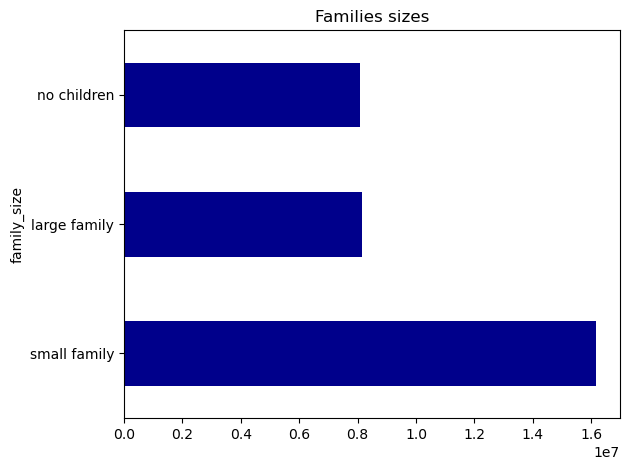

In [20]:
bar_family = dcop_merged['family_size'].value_counts().plot.barh(color = 'darkblue')
plt.title("Families sizes",fontsize=12)
plt.tight_layout()

In [21]:
# Exporting bar chart
bar_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','family_bar.png'))

In [ ]:
# Export final version of dataset
dcop_merged.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'Instacart_final.pkl'))

In [ ]:
dcop_merged.info()